**Name- Arkadipta Mojumder**

**Registration Number - 22MCA0201**

**Midterm LAB Assessment**

**27/07/2023**

**Q2. Implement classification using KNN for a given Iris dataset . Also perform data exploration techniques and compute confusion matrix,accuracy and precision.**


**Dataset Link-**

https://drive.google.com/file/d/1ia5aGf9OVEqXIV6JZYemdYxtJB4jibCS/view?usp=drive_link

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('2iris.csv')

In [3]:
dataset.shape

(150, 8)

In [4]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Unnamed: 6,Unnamed: 7
0,1,5.1,3.5,1.4,0.2,Iris-setosa,NaN,NaN
1,2,4.9,3.0,1.4,0.2,Iris-setosa,NaN,NaN
2,3,4.7,3.2,1.3,0.2,Iris-setosa,NaN,NaN
3,4,4.6,3.1,1.5,0.2,Iris-setosa,NaN,NaN
4,5,5.0,3.6,1.4,0.2,Iris-setosa,NaN,NaN


In [ ]:
##dataset = dataset.drop("Unnamed: 7", axis = 'columns')

In [9]:
dataset = dataset.drop("Unnamed: 6", axis = 'columns')

In [10]:
##dataset.shape

(150, 6)

**Filling the missing values in "PetalLengthCm"**

In [11]:
dataset['PetalLengthCm'] = dataset['PetalLengthCm'].fillna(dataset.groupby('Species')['PetalLengthCm'].transform('mean'))

In [12]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.761971,1.198667
std,43.445368,0.828066,0.433594,1.759778,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [14]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

**Label Encoding**

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Data Visualization**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Pairplot**

<Figure size 640x480 with 0 Axes>

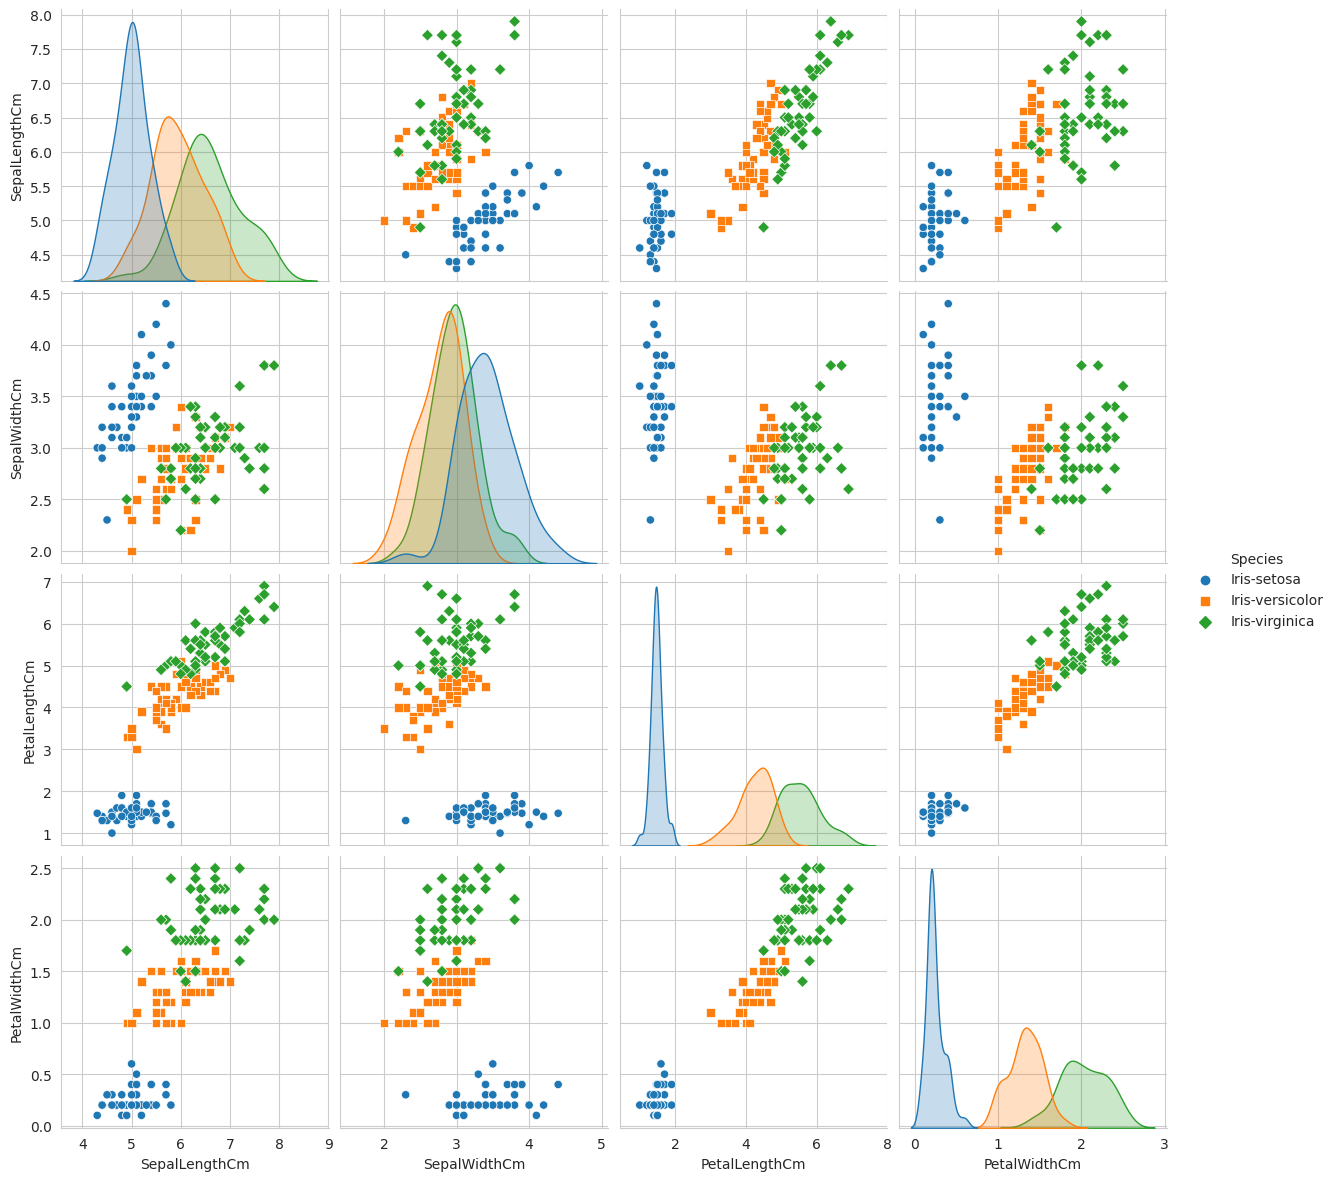

In [29]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", height = 3, markers=["o", "s", "D"])
plt.show()

**Boxplot**

<Figure size 640x480 with 0 Axes>

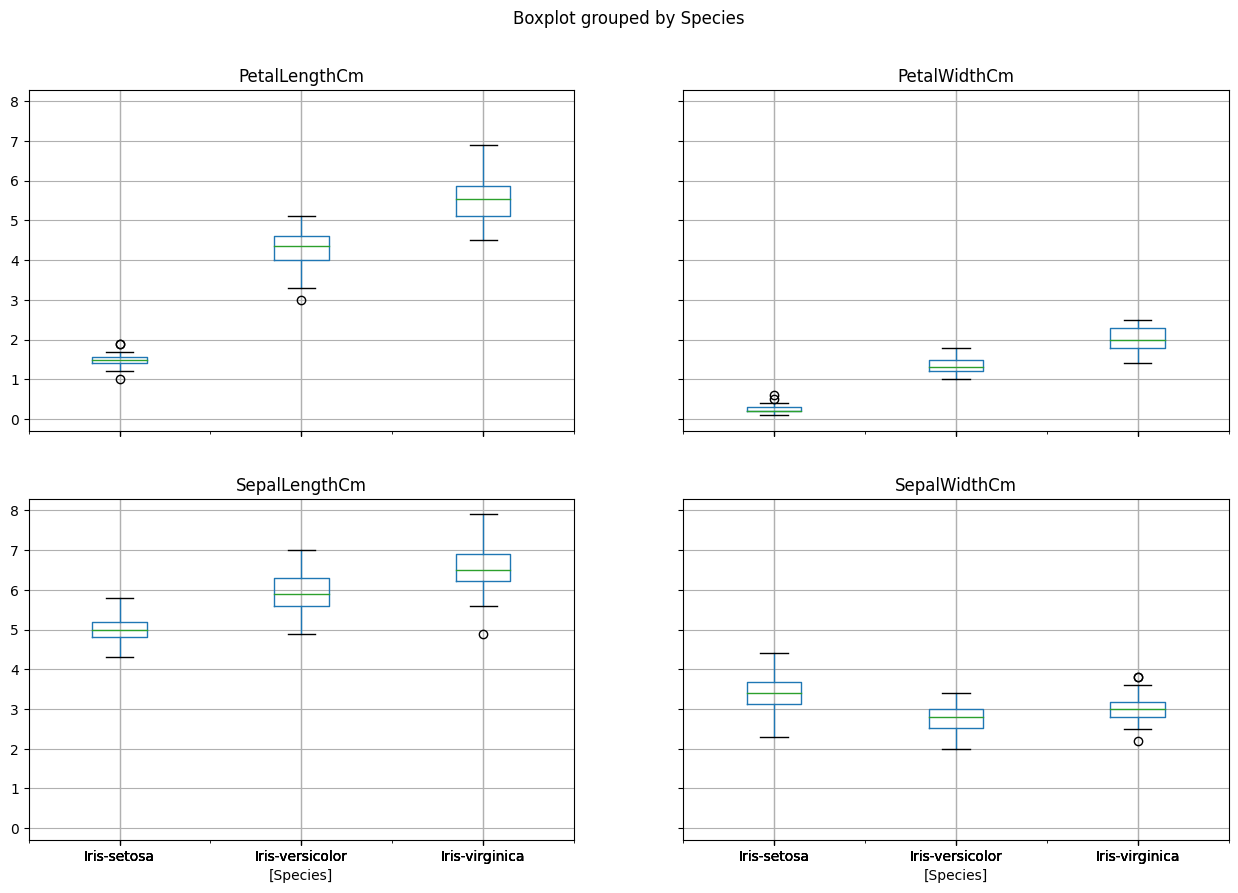

In [20]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

**Using KNN for classification**

***Making predictions***

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score,classification_report
from sklearn.model_selection import cross_val_score


# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(50.722222222222214, 0.5, 'Actual')

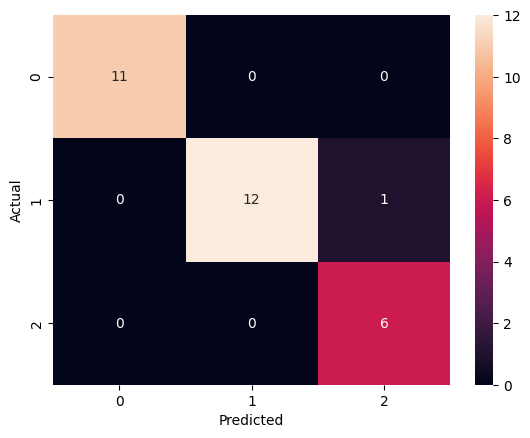

In [23]:
#Confusion matrix visualization

sns.heatmap(cm, annot = True)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [24]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')
print("Precision Score : ",precision_score(y_test, y_pred,
                                           pos_label='positive',
                                           average='micro'))

Accuracy of our model is equal 96.67 %.
Precision Score :  0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Accuracy of our model is equal 96.67 %.**

In [26]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

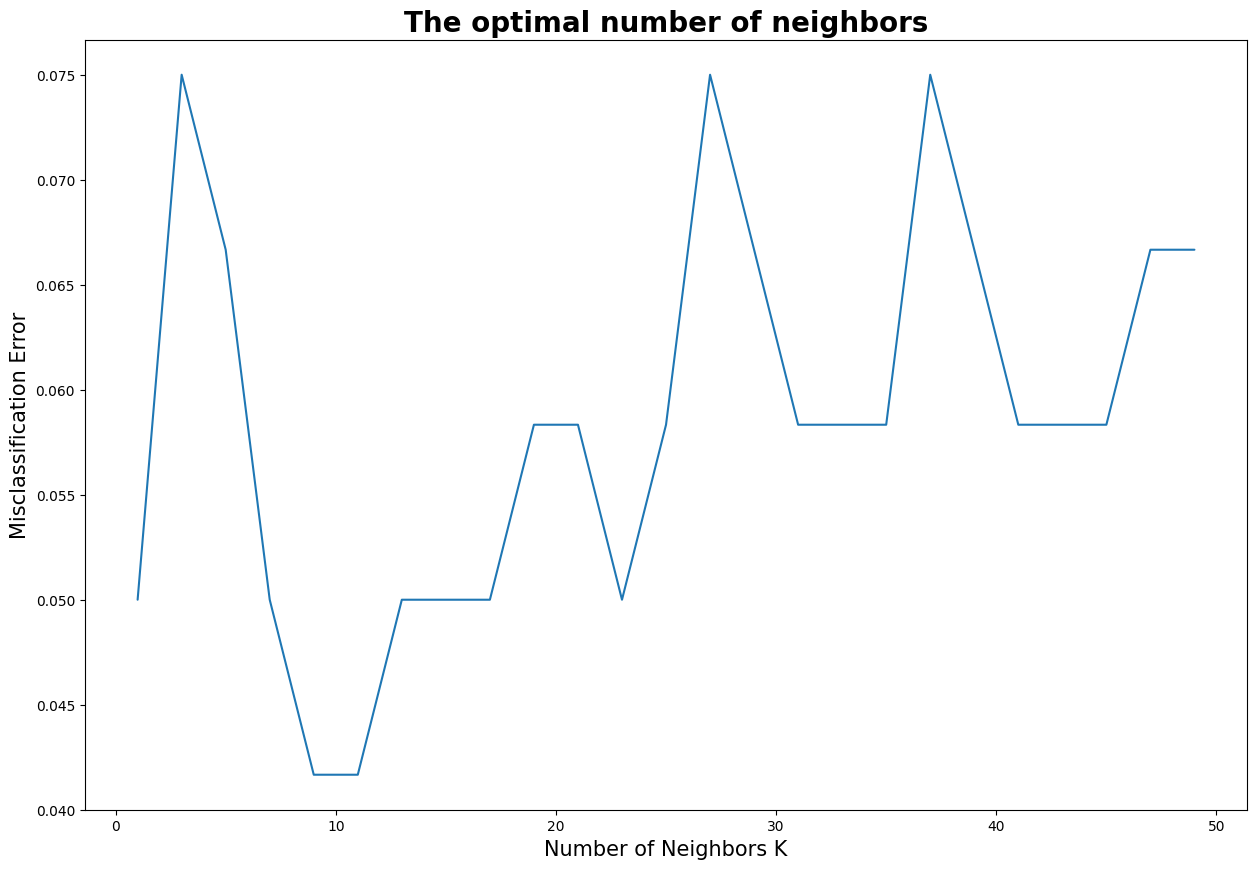

In [27]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [28]:
#finding the best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 9


**Accuracy of our model is equal to 96.67 %**

**Precision of our model is equal to 0.96**